In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import metrics
warnings.filterwarnings("ignore")

from lifelines.datasets import load_dd

data = load_dd()
print(data.head())

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = data["duration"]
E = data["observed"]

      ctryname  cowcode2  politycode un_region_name un_continent_name  \
0  Afghanistan       700       700.0  Southern Asia              Asia   
1  Afghanistan       700       700.0  Southern Asia              Asia   
2  Afghanistan       700       700.0  Southern Asia              Asia   
3  Afghanistan       700       700.0  Southern Asia              Asia   
4  Afghanistan       700       700.0  Southern Asia              Asia   

                   ehead                                     leaderspellreg  \
0    Mohammad Zahir Shah  Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...   
1  Sardar Mohammad Daoud  Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...   
2    Mohammad Zahir Shah  Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...   
3  Sardar Mohammad Daoud  Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...   
4    Nur Mohammad Taraki  Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...   

       democracy         regime  start_year  duration  observed  
0  Non-democracy    

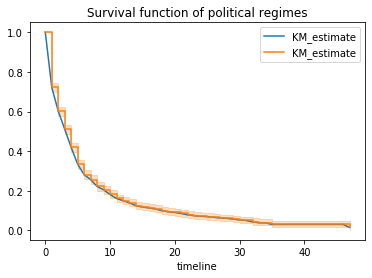

In [4]:
kmf.fit(T, event_observed=E)

kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

kmf.plot()


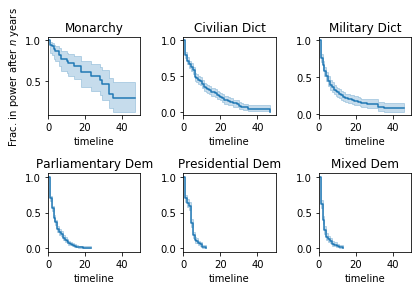

In [5]:
regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()